# Airbnb Cambridge 2022-2023
# Market Supply and Demand Data Exploration
# Text Mining and Topic Modeling

### Search for "Insight"

In [4]:
# Import required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import data_table
from google.colab import drive  # Must run to load data from google drive
pd.set_option('display.max_columns', None)
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Loading datasets from http://insideairbnb.com/get-the-data/

In [ ]:
# Import Airbnb data for 1 year period - Option 1 (Local)

##from google.colab import files
##uploaded = files.upload()

In [6]:
# Import Airbnb data for 1 year period - Option 2 (Google Drive)
#	reviews.csv.gz, calendar.csv.gz, 	listings.csv.gz files were used from each quater

dataFile='reviews_Sep22.csv'
drive.mount("/content/drive", force_remount=True)
url = '/content/drive/MyDrive/Airbnb_Project/'+ dataFile
reviews_Sep22 = pd.read_csv(url,sep=",",)
drive.flush_and_unmount()

dataFile='reviews_Dec22.csv'
drive.mount("/content/drive", force_remount=True)
url = '/content/drive/MyDrive/Airbnb_Project/'+ dataFile
reviews_Dec22 = pd.read_csv(url,sep=",",)
drive.flush_and_unmount()

dataFile='reviews_March23.csv'
drive.mount("/content/drive", force_remount=True)
url = '/content/drive/MyDrive/Airbnb_Project/'+ dataFile
reviews_March23 = pd.read_csv(url,sep=",",)
drive.flush_and_unmount()

dataFile='reviews_June23.csv'
drive.mount("/content/drive", force_remount=True)
url = '/content/drive/MyDrive/Airbnb_Project/'+ dataFile
reviews_June23 = pd.read_csv(url,sep=",",)
drive.flush_and_unmount()

dataFile='listings_Sep22.csv'
drive.mount("/content/drive", force_remount=True)
url = '/content/drive/MyDrive/Airbnb_Project/'+ dataFile
listings_Sep22 = pd.read_csv(url,sep=",",)
drive.flush_and_unmount()

dataFile='listings_Dec22.csv'
drive.mount("/content/drive", force_remount=True)
url = '/content/drive/MyDrive/Airbnb_Project/'+ dataFile
listings_Dec22 = pd.read_csv(url,sep=",",)
drive.flush_and_unmount()

dataFile='listings_March23.csv'
drive.mount("/content/drive", force_remount=True)
url = '/content/drive/MyDrive/Airbnb_Project/'+ dataFile
listings_March23 = pd.read_csv(url,sep=",",)
drive.flush_and_unmount()

dataFile='listings_June23.csv'
drive.mount("/content/drive", force_remount=True)
url = '/content/drive/MyDrive/Airbnb_Project/'+ dataFile
listings_June23 = pd.read_csv(url,sep=",",)
drive.flush_and_unmount()

dataFile='calendar_Sep22.csv'
drive.mount("/content/drive", force_remount=True)
url = '/content/drive/MyDrive/Airbnb_Project/'+ dataFile
calendar_Sep22 = pd.read_csv(url,sep=",",)
drive.flush_and_unmount()

dataFile='calendar_Dec22.csv'
drive.mount("/content/drive", force_remount=True)
url = '/content/drive/MyDrive/Airbnb_Project/'+ dataFile
calendar_Dec22 = pd.read_csv(url,sep=",",)
drive.flush_and_unmount()

dataFile='calendar_March23.csv'
drive.mount("/content/drive", force_remount=True)
url = '/content/drive/MyDrive/Airbnb_Project/'+ dataFile
calendar_March23 = pd.read_csv(url,sep=",",)
drive.flush_and_unmount()

dataFile='calendar_June23.csv'
drive.mount("/content/drive", force_remount=True)
url = '/content/drive/MyDrive/Airbnb_Project/'+ dataFile
calendar_June23 = pd.read_csv(url,sep=",",)
drive.flush_and_unmount()

Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive


In [7]:
# Create single datasets for reviews, calendar, listing
reviews = pd.concat([reviews_Sep22, reviews_Dec22, reviews_March23, reviews_June23])
calendar = pd.concat([calendar_Sep22, calendar_Dec22, calendar_March23, calendar_June23])
listings = pd.concat([listings_Sep22, listings_Dec22, listings_March23, listings_June23])

# Market Supply

In [9]:
################################################################################
#                                                                              #
# Make Copy from Master Datasets for Use                                       #
#                                                                              #
################################################################################

# Used for Market Supply and Demand

reviews_s = reviews.copy()
calendar_s = calendar.copy()
listings_s = listings.copy()

In [10]:
calendar_s.info()
listings_s.describe().T

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2249130 entries, 0 to 387264
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      int64 
 1   date            object
 2   available       object
 3   price           object
 4   adjusted_price  object
 5   minimum_nights  int64 
 6   maximum_nights  int64 
dtypes: int64(3), object(4)
memory usage: 137.3+ MB


,count,mean,std,min,25%,50%,75%,max
id,6164.0,1.862898e+17,3.049425e+17,7.903000e+03,2.041975e+07,4.576540e+07,5.712315e+17,9.226014e+17
scrape_id,6164.0,2.022421e+13,4.490883e+09,2.022092e+13,2.022092e+13,2.022092e+13,2.023033e+13,2.023063e+13
host_id,6164.0,1.249064e+08,1.328471e+08,6.094000e+03,2.085777e+07,8.814034e+07,1.887523e+08,5.188824e+08
host_listings_count,6164.0,6.464176e+02,1.524211e+03,1.000000e+00,2.000000e+00,1.300000e+01,8.700000e+01,4.817000e+03
host_total_listings_count,6164.0,7.515891e+02,1.696774e+03,1.000000e+00,3.000000e+00,1.900000e+01,1.160000e+02,5.651000e+03
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,6164.0,4.236914e+01,1.523213e-02,4.233308e+01,4.236017e+01,4.236857e+01,4.237821e+01,4.242290e+01
longitude,6164.0,-7.110122e+01,2.399435e-02,-7.117800e+01,-7.111830e+01,-7.110205e+01,-7.108323e+01,-7.104845e+01
accommodates,6164.0,3.125081e+00,1.899749e+00,0.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
calendar_s['available'].value_counts()

t    1144284
f    1104846
Name: available, dtype: int64

In [12]:
# Number of Active Listings
num_active_listings = len(listings_s)
num_active_listings

6164

In [13]:
# Convert dates into dattime format
calendar_s['date'] = pd.to_datetime(calendar_s['date'])

In [14]:
# Number of Listings by Type
listings_by_type = listings_s['property_type'].value_counts()
listings_by_type

Entire rental unit                   2799
Private room in rental unit           910
Private room in home                  677
Entire condo                          397
Entire serviced apartment             311
Entire home                           238
Room in boutique hotel                160
Entire guest suite                    105
Private room in bed and breakfast     102
Room in hotel                          91
Private room in condo                  84
Entire townhouse                       67
Private room in townhouse              61
Entire loft                            46
Private room in casa particular        26
Shared room in rental unit             20
Private room in guest suite            12
Boat                                    8
Private room in cottage                 8
Entire place                            7
Shared room in home                     5
Entire villa                            5
Shared room in condo                    4
Private room in loft              

In [15]:
# Number of Listings Over Time:
#With the calendar dataset, we can calculate how the number of active listings changes over time.
#We can consider a listing 'active' on a given date if it's available on that date

active_listings_over_time = calendar_s[calendar_s['available'] == 't'].groupby('date')['listing_id'].nunique()
active_listings_over_time

date
2022-09-22    417
2022-09-23    436
2022-09-24    415
2022-09-25    603
2022-09-26    625
             ... 
2024-06-22    486
2024-06-23    487
2024-06-24    488
2024-06-25    488
2024-06-26    486
Name: listing_id, Length: 644, dtype: int64

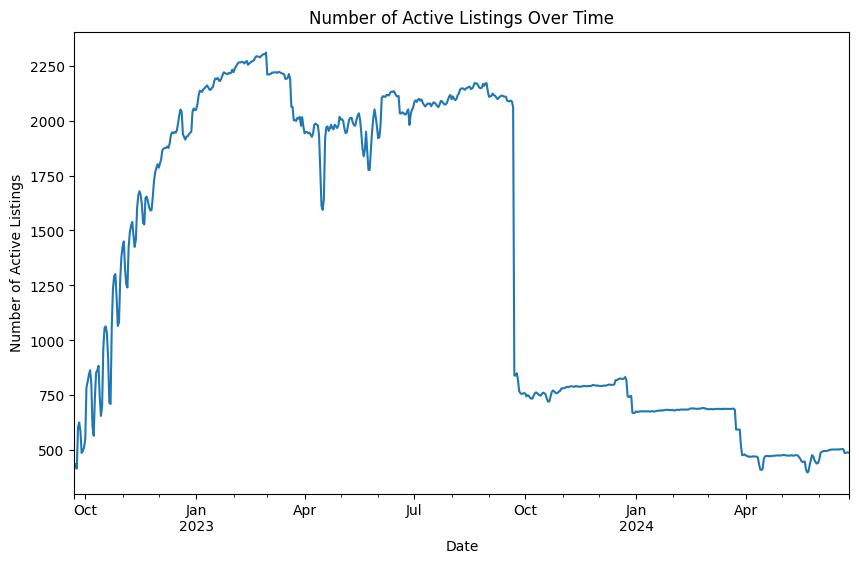

In [16]:
# Plotting to see how supply changes over time
import matplotlib.pyplot as plt
calendar_s['date'] = pd.to_datetime(calendar_s['date'])
active_listings_over_time = calendar_s[calendar_s['available'] == 't'].groupby('date')['listing_id'].nunique()

plt.figure(figsize=(10, 6))
active_listings_over_time.plot(kind='line')
plt.title('Number of Active Listings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Active Listings')
plt.show()

**Insight:**
- Drop in listings several months out is not indicative of real decrease in supply, but rather reflects the dynamic nature of short term rentals.
- Owners are less likely to list their rooms/homes many months in advance especially outside of peak season.

# Market Demand or Estimated Occupancy

In [17]:
#Average monthly review per listing
# Convert the 'date' column in the reviews dataframe to datetime
reviews_s['date'] = pd.to_datetime(reviews_s['date'])

# Extract month and year from the 'date' column and create a new 'year_month' column
reviews_s['year_month'] = reviews_s['date'].dt.to_period('M')

# Group by 'listing_id' and 'year_month', count the number of reviews, then reset index
reviews_per_month = reviews_s.groupby(['listing_id', 'year_month']).size().reset_index(name='review_count')

# Group by 'year_month' and calculate the average number of reviews per listing
avg_reviews_per_month = reviews_per_month.groupby('year_month')['review_count'].mean().reset_index()

avg_reviews_per_month

,year_month,review_count
0,2009-07,6.500000
1,2009-08,2.000000
2,2010-03,3.333333
3,2010-04,2.000000
4,2010-05,2.666667
...,...,...
157,2023-02,5.050847
158,2023-03,5.380795
159,2023-04,3.612426
160,2023-05,3.554430


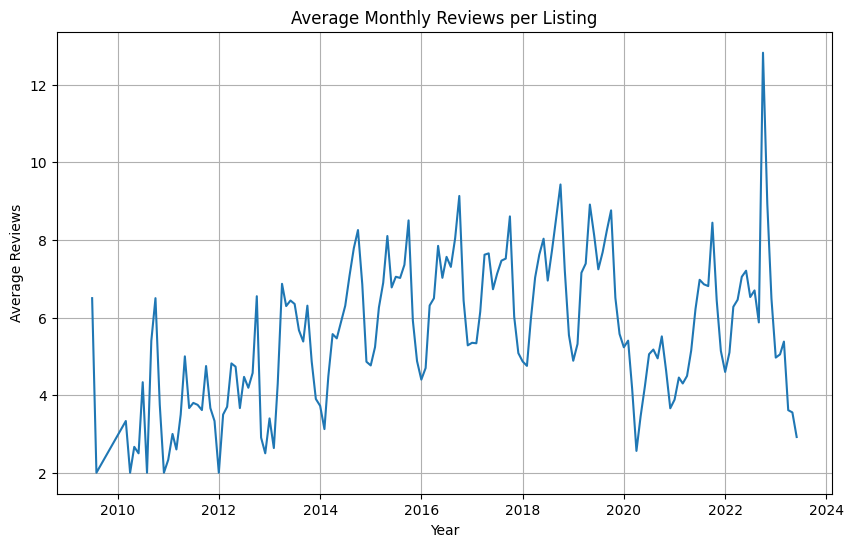

In [18]:
# Convert 'year_month' to datetime for plotting
avg_reviews_per_month['year_month'] = avg_reviews_per_month['year_month'].astype('datetime64[ns]')

plt.figure(figsize=(10, 6))
plt.plot(avg_reviews_per_month['year_month'], avg_reviews_per_month['review_count'])
plt.title('Average Monthly Reviews per Listing')
plt.xlabel('Year')
plt.ylabel('Average Reviews')
plt.grid()
plt.show()

## Estimated Airbnb Occupancy

**Insight:** Airbnb does not publically provide occupancy data for individual units.

Parameters Used for San Francisco Model
(https://commissions.sfplanning.org/cpcpackets/2014-001033PCA.pdf)

Average Night of Stay for Cambridge - 5 (high demand)

Review Rate Multipler - 50% (recommendation)

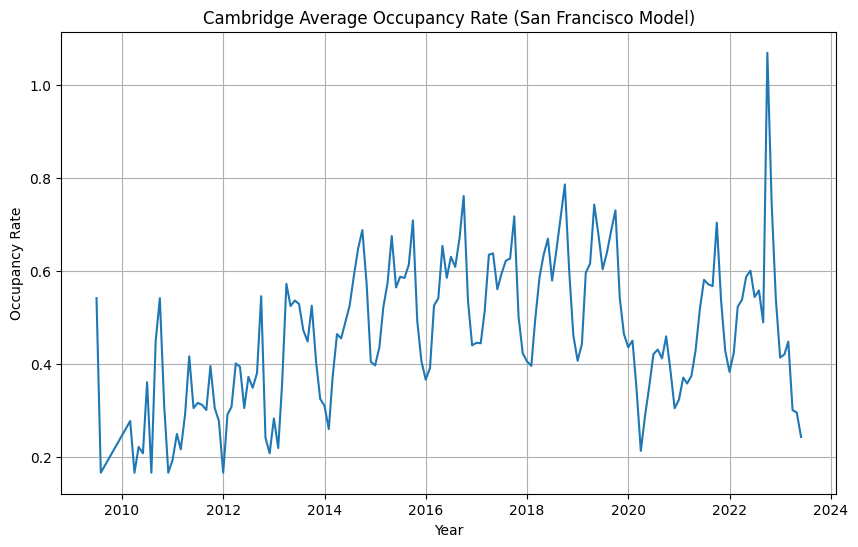

In [19]:
# San Francisco Model for Airbnb Occupancy (Review Count as Determinant for Occupancy)
# http://insideairbnb.com/data-assumptions/
# #reviews*review_rate_multiplier*avg_length_of_stay(in city)

# 5.5 is reported average night of stay for San Francisco, 4=national average
# 69% is the reported occupancy of Cambridge MA recently (Summer) => Target of 70% average for summer peaks in this model using avg_stay=5
# https://data.rabbu.com/airbnb-data/cambridge-ma

avg_length_of_stay = 5 #average for the city not individual unit
review_rate_multiplier = 0.5
avg_reviews_per_month['occupancy_sf'] = (avg_reviews_per_month['review_count']*review_rate_multiplier*avg_length_of_stay)/30
avg_reviews_per_month

plt.figure(figsize=(10, 6))
plt.plot(avg_reviews_per_month['year_month'], avg_reviews_per_month['occupancy_sf'])
plt.title('Cambridge Average Occupancy Rate (San Francisco Model)')
plt.xlabel('Year')
plt.ylabel('Occupancy Rate')
plt.grid()
plt.show()

**Insight:**

An occupancy rate of above 100% is impossible so a cap of 70% was set for the model to mirror that of a "highly occupied hotel"

http://insideairbnb.com/data-assumptions/

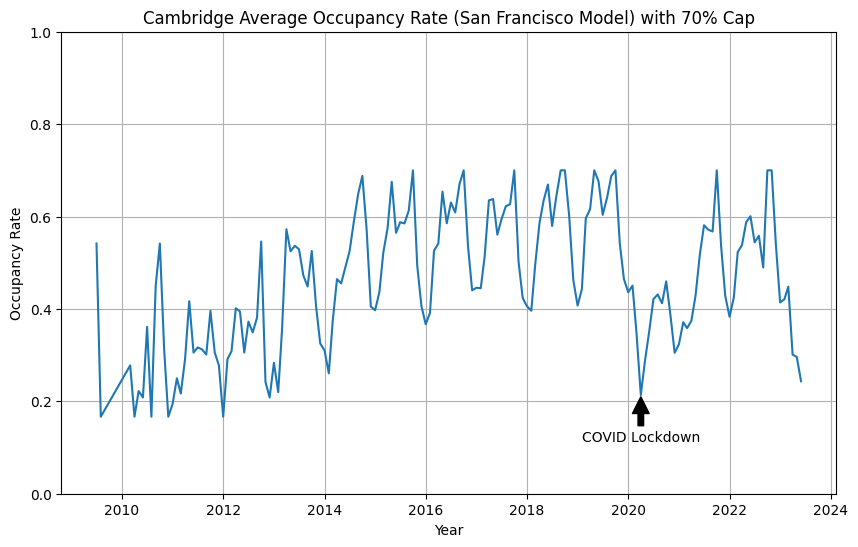

In [26]:
# Average Occupancy of Cambridge with 70% Cap

avg_length_of_stay = 5 #average for the city not individual unit
review_rate_multiplier = 0.5
avg_reviews_per_month['occupancy_sf'] = (avg_reviews_per_month['review_count']*review_rate_multiplier*avg_length_of_stay)/30
avg_reviews_per_month

# Cap Occupancy
avg_reviews_per_month['occupancy_sf'] = avg_reviews_per_month['occupancy_sf'].clip(upper=0.7)

plt.figure(figsize=(10, 6))
plt.plot(avg_reviews_per_month['year_month'], avg_reviews_per_month['occupancy_sf'])
plt.title('Cambridge Average Occupancy Rate (San Francisco Model) with 70% Cap')
plt.xlabel('Year')
plt.ylabel('Occupancy Rate')
plt.grid()
plt.ylim(0, 1)

# Find the index of the local minimum between 2020 and 2021
local_min_index = (avg_reviews_per_month['year_month'] >= '2020') & (avg_reviews_per_month['year_month'] <= '2021')
local_min_index = avg_reviews_per_month[local_min_index]['occupancy_sf'].idxmin()

# Mark the local minimum
plt.annotate('COVID Lockdown',
             xy=(avg_reviews_per_month['year_month'][local_min_index], avg_reviews_per_month['occupancy_sf'][local_min_index]),
             xytext=(avg_reviews_per_month['year_month'][local_min_index], avg_reviews_per_month['occupancy_sf'][local_min_index] - 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10,
             ha='center')

plt.show()

**Insight:**

- Strong seasonal demand during the summer every year
- Exception being 2020 because of COVID Lockdown

# Topic Modeling of Customer Comments

In [ ]:
################################################################################
#                                                                              #
# Make Copy from Master Datasets for Individual Use                            #
#                                                                              #
################################################################################

# Used for Text Mining

reviews_x = reviews.copy()
calendar_x = calendar.copy()
listings_x = listings.copy()

In [ ]:
# Preprocessing of Text Mining
##reviews_x.info()
simple_text = reviews_x.comments
simple_text = pd.Series(simple_text)
simple_text = simple_text.str.lower()
# Remove Stopwords
import nltk
nltk.download('stopwords')
# Convert NaN into empty
simple_text = simple_text.fillna('')
from nltk.corpus import stopwords
stop = stopwords.words('english')
simple_text = simple_text.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Remove punctuation for for lemming
##simple_text = simple_text.str.replace(r'[^\w\s+]', '',regex=True)
simple_text = simple_text.str.replace(pat='[^\w\s]', repl=' ', regex=True)

# Lemming instead of stemming
doStemming = False

if doStemming:
    from nltk.stem import PorterStemmer
    st = PorterStemmer()
    simple_text = simple_text.apply(
        lambda x: " ".join([st.stem(word) for word in x.split()]))
else:
    from nltk.stem import WordNetLemmatizer
    from nltk.tokenize import word_tokenize
    import nltk
    nltk.download('wordnet')
    nltk.download('punkt')

    lemmatizer = WordNetLemmatizer()
    simple_text = simple_text.apply(
        lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Create unigrams and bigrams

from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams
#vectorizer = CountVectorizer(ngram_range=(1,2))
words = ' '.join(simple_text).split()

# Generate unigrams and bigrams and combine
unigrams = words
#bigrams = ['_'.join(w) for w in ngrams(words, 2)]
#allgrams = unigrams + bigrams

# Check for items inside n-grams
#print(allgrams[:20])
#print(allgrams[-20:])

In [ ]:
# Remove more stopwords
stop += ['would','may','one', 'must','upon','might','ought','shall','could', 'i', 'm', 'stacy','br','u','le']
simple_text = simple_text.apply(lambda x: " ".join(x for x in x.split()
                                                           if x not in stop))
wordlist = str(' '.join(simple_text).split())

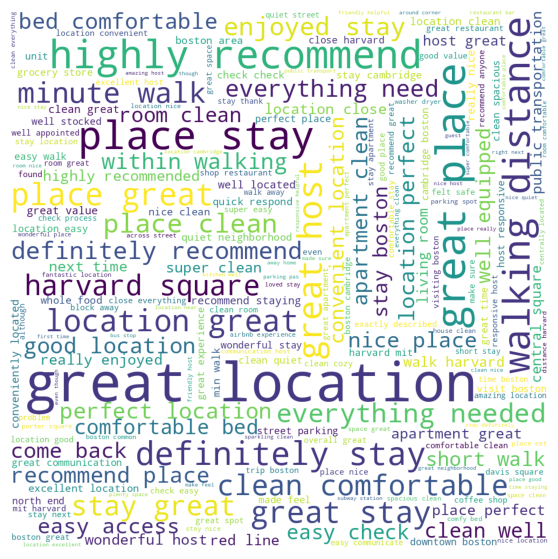

In [ ]:
# Wordcloud
from wordcloud import WordCloud
import string
wordlist = wordlist.translate(str.maketrans('','',string.punctuation))
wordcloud = WordCloud(background_color='white',
                      max_words=200,
                      width=1000,height=1000).generate(wordlist)

plt.figure(figsize=(7,7))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# Similarity and Clustering

# Tokenize each document
corpus = [doc.split() for doc in simple_text]
##print(type(corpus), type(corpus[0]), type(corpus[0][0]))
##print(len(corpus[0]))
##print(corpus[0][:10])

from gensim import corpora, models
dictionary = corpora.Dictionary(corpus)
dictionary.filter_extremes(no_below=10, no_above=0.75)
DFM = [dictionary.doc2bow(doc) for doc in corpus]
# Take 1st 30,000 samples due to program stalling out with 300k samples
DFM = DFM[:10000]
# 10,000 samples provide optimal timing

print(len(DFM))
#print(dictionary.token2id)
#print(len(dictionary.token2id))

10000


In [ ]:
# Compute similarity between documents
### Fail to Complete in Time => Skip/troubleshoot Later ###
from gensim.similarities import MatrixSimilarity
simil = MatrixSimilarity(DFM, num_features=len(dictionary))
distance = 1 - simil[DFM]
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
Z = hierarchy.linkage(distance, 'complete')
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(Z, orientation='right', leaf_font_size = '11', labels=reviews_x.index)

In [ ]:
################################################################################
#                                                                              #
# INSTALL pyLDAvis for Topic Modeling                                          #
#                                                                              #
################################################################################
!pip install pyLDAvis

In [ ]:
# Topic Modeling
import gensim
from gensim import models
import pyLDAvis
import pyLDAvis.gensim_models

n_topics = 2
ldamodel = models.LdaModel(DFM, num_topics=n_topics,id2word = dictionary, passes=20)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, DFM, dictionary)
vis

# Top 2 topics involve ambience and atmopshere of the rental location and the rental's surrounding locations i.e. tourist spots around it

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.188499  0.0       1        1  87.625903
0     -0.188499  0.0       2        1  12.374097, topic_info=            Term         Freq        Total Category  logprob  loglift
193     location  4168.000000  4168.000000  Default  30.0000  30.0000
76         great  6224.000000  6224.000000  Default  29.0000  29.0000
2347       north  1156.000000  1156.000000  Default  28.0000  28.0000
944          end  1005.000000  1005.000000  Default  27.0000  27.0000
8         boston  3609.000000  3609.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
2      apartment   439.480086  3728.209475   Topic2  -4.3973  -0.0485
512   restaurant   239.721291  1575.375166   Topic2  -5.0034   0.2068
97       perfect   227.819374  1605.872697   Topic2  -5.0544   0.1367
1238         old   189.077605   598.268867   Topic2  -5.2408   0.9377
166        right   190.060669   762.968426   Topic2  -5.2356   0.6997

[141 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1         1  0.998571         also
1         2  0.001547         also
2         1  0.882193    apartment
2         2  0.117751    apartment
405       1  0.007528  appartement
...     ...       ...          ...
52        2  0.002604         well
129       1  0.990042    wonderful
129       2  0.010085    wonderful
1086      1  0.005365            à
1086      2  0.997890            à

[193 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])